In [276]:
import pandas as pd
import requests
import lxml
import html5lib
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
#from bs4 import beautifulsoup4
#https://developers.tiktok.com/doc/research-api-specs-query-videos/
#https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc
# Library for opening url and creating 
# requests
import urllib.request

# pretty-print python data structures
from pprint import pprint

# for parsing all the tables present 
# on the website
from html_table_parser.parser import HTMLTableParser

In [191]:
sf_popdata_2022 = pd.read_csv("SF_NOCENSUS_HOOD_POP_2022.csv")
sf_popdata_2018 = pd.read_csv("SF_CENSUS_HOOD_POP_2018.csv")
sf_popdata_2019 = pd.read_csv("SF_CENSUS_HOOD_POP_2019.csv")
sf_popdata_2020 = pd.read_csv("SF_CENSUS_HOOD_POP_2020.csv")
sf_popdata_2021 = pd.read_csv("SF_CENSUS_HOOD_POP_2021.csv")
sf_zip_hood = pd.read_csv("SF_ZIPCODE_HOOD.csv")

In [188]:
#df.read_csv('foo.tsv', sep='\t', thousands=',')
#sf_popdata_2018 = pd.read_csv("SF_CENSUS_HOOD_POP_2018.csv", sep="\t", thousands=',')
df['colname'] = df['colname'].str.replace(',', '').astype(float)

In [192]:
df_popdata_2018 = pd.DataFrame(sf_popdata_2018)
df_popdata_2019 = pd.DataFrame(sf_popdata_2019)
df_popdata_2020 = pd.DataFrame(sf_popdata_2020)
df_popdata_2021 = pd.DataFrame(sf_popdata_2021)
#df_popdata_2022 = pd.DataFrame(sf_popdata_2022)
df_zip_hood = pd.DataFrame(sf_zip_hood)

In [343]:
sf_merge_pop = pd.concat([df_2018_merged_dropdupes, df_2019_merged_dropdupes, df_2020_merged_dropdupes, df_2021_merged_dropdupes, df_2022_merged_dropdupes], axis=0)
sf_merge_pop.to_csv("SF_POP_ZIP_HOOD_ALLYEARS.csv")
sf_merge_pop

,ZIP,Neighborhood,Population,Year
0,94102,Financial District,31067.0,2018
1,94102,Hayes Valley,31067.0,2018
2,94102,Mission,31067.0,2018
3,94102,Nob Hill,31067.0,2018
4,94102,South of Market,31067.0,2018
...,...,...,...,...
132,94118,Seacliff,2501.0,2022
133,94121,Seacliff,2501.0,2022
134,94129,Seacliff,2501.0,2022
135,94124,Treasure Island,3185.0,2022


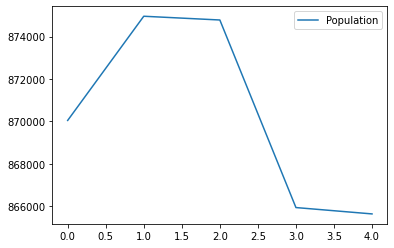

In [314]:
sf_yearly_pop_dict = {
    "Year": ["2018", "2019", "2020", "2021", "2022"], 
    "Population": [SFpop2018["Total Population"].max(), SFpop2019["Total Population"].max(), SFpop2020["Total Population"].max(), SFpop2021["Total Population"].max(), SFpop2022["Total Population"].max()]
}
sf_yearly_pop = pd.DataFrame(sf_yearly_pop_dict)
sf_yearly_pop.plot.line()
sf_yearly_pop.to_csv("SF_POP_YEARLY.csv")

In [267]:
#13 rows of data per zip code, only 3rd row has population of zip code 
#Function for finding sets of rows with relevant value 
df_popdata_2018

,Label (Grouping),Total population
0,"San Francisco County, California",NaN
1,Total,NaN
2,Estimate,"870,044"
3,Percent,NaN
4,Estimate,(X)
...,...,...
749,Estimate,(X)
750,Female,NaN
751,Estimate,"18,554"
752,Percent Female,NaN


In [326]:
temp2018 = df_popdata_2018
temp2018 = temp2018.replace('(X)', np.nan)
temp2018 = temp2018.dropna()
temp2018["Total population"] = temp2018['Total population'].str.replace(',', '').astype(float)
temp2018["Total population"].max()
dict2018 = {
    "Location": ["San Francisco County"], 
    "Total Population": [temp2018["Total population"].max()]
}
SFpop2018 = pd.DataFrame(dict2018)
SFpop2018.to_csv("SF_POP_2018.csv")

In [344]:
zip_pop = [] #2018
for i in zip_codes:
    # find the index of the row with zip code
    zip_index = df_popdata_2018.loc[df_popdata_2018["Label (Grouping)"].str.contains(str(i))].index[0]
    #print(zip_index)

    # select the row with the relevant data (two rows below the zip code)
    relevant_row = df_popdata_2018.iloc[zip_index + 2]["Total population"]
    #print(relevant_row)
    zip_pop.append(relevant_row) 
    
    # create a new dictionary with the data from the relevant row
    zip_pop_2018 = {
        'Zip Code': zip_codes,
        'Population': zip_pop,
    }
    
# convert dict to dataframe, drop duplicates, reset index 
df_popdata_2018_clean = pd.DataFrame.from_dict(zip_pop_2018)

#Remove commas and turn to float
df_popdata_2018_clean['Population'] = df_popdata_2018_clean['Population'].str.replace(',', '').astype(float)

#Convert ["Population"] from object to integer
df_popdata_2018_clean_dropdupes = df_popdata_2018_clean.drop_duplicates()
df_popdata_2018_clean_dropdupes_reset = df_popdata_2018_clean_dropdupes.reset_index(drop=True)
df_popdata_2018_clean_dropdupes_reset #.to_csv("2018_POP_BYZIPCODE.csv")

,Zip Code,Population
0,94102,31067.0
1,94103,28735.0
2,94104,546.0
3,94105,9155.0
4,94107,29689.0
5,94108,14550.0
6,94109,56677.0
7,94110,74161.0
8,94111,3620.0
9,94112,85166.0


In [350]:
#df_popdata_2018_clean_dropdupes_reset
df_zip_hood

,ZIP,Neighborhood
0,94102,Financial District
1,94102,Hayes Valley
2,94102,Mission
3,94102,Nob Hill
4,94102,South of Market
...,...,...
150,94134,McLaren Park
151,94134,Portola
152,94134,Visitacion Valley
153,94158,Mission Bay


In [339]:
df_2018_merged = pd.merge(df_zip_hood, df_popdata_2018_clean_dropdupes_reset, left_on='ZIP', right_on="Zip Code", how='inner') #[['zip_code', 'population', 'neighborhood']]
df_2018_merged_dropdupes = df_2018_merged.drop_duplicates()
df_2018_merged_dropdupes = df_2018_merged_dropdupes.drop("Zip Code", axis=1)
df_2018_merged_dropdupes = df_2018_merged_dropdupes.rename(columns={"Nhood": "Neighborhood"})
df_2018_merged_dropdupes["Year"] = "2018"
df_2018_merged_dropdupes.to_csv("SF_2018_POP_ZIP_HOOD.csv")
df_2018_merged_dropdupes

,ZIP,Neighborhood,Population,Year
0,94102,Financial District,31067.0,2018
1,94102,Hayes Valley,31067.0,2018
2,94102,Mission,31067.0,2018
3,94102,Nob Hill,31067.0,2018
4,94102,South of Market,31067.0,2018
...,...,...,...,...
150,94134,McLaren Park,42471.0,2018
151,94134,Portola,42471.0,2018
152,94134,Visitacion Valley,42471.0,2018
153,94158,Mission Bay,7291.0,2018


In [258]:
#df_popdata_2019

In [315]:
temp2019 = df_popdata_2019
temp2019 = temp2019.replace('(X)', np.nan)
temp2019 = temp2019.dropna()
temp2019["Total population"] = temp2019['Total population'].str.replace(',', '').astype(float)
temp2019["Total population"].max()
dict2019 = {
    "Location": ["San Francisco County"], 
    "Total Population": [temp2019["Total population"].max()]
}
SFpop2019 = pd.DataFrame(dict2019)
SFpop2019.to_csv("SF_POP_2019.csv")

In [220]:
zip_pop = [] #2019
for i in zip_codes:
    # find the index of the row with zip code
    zip_index = df_popdata_2019.loc[df_popdata_2019["Label (Grouping)"].str.contains(str(i))].index[0]
    #print(zip_index)

    # select the row with the relevant data (two rows below the zip code)
    relevant_row = df_popdata_2019.iloc[zip_index + 2]["Total population"]
    #print(relevant_row)
    zip_pop.append(relevant_row) 
    
    # create a new dictionary with the data from the relevant row
    zip_pop_2019 = {
        'Zip Code': zip_codes,
        'Population': zip_pop,
    }
    
# convert dict to dataframe, drop duplicates, reset index 
df_popdata_2019_clean = pd.DataFrame.from_dict(zip_pop_2019)

#Remove commas and turn to float
df_popdata_2019_clean['Population'] = df_popdata_2019_clean['Population'].str.replace(',', '').astype(float)

#Convert ["Population"] from object to integer
df_popdata_2019_clean_dropdupes = df_popdata_2019_clean.drop_duplicates()
df_popdata_2019_clean_dropdupes_reset = df_popdata_2019_clean_dropdupes.reset_index(drop=True)
df_popdata_2019_clean_dropdupes_reset.to_csv("2019_POP_BYZIPCODE.csv")

In [338]:
df_2019_merged = pd.merge(df_zip_hood, df_popdata_2019_clean_dropdupes_reset, left_on='ZIP', right_on="Zip Code", how='inner') #[['zip_code', 'population', 'neighborhood']]
df_2019_merged_dropdupes = df_2019_merged.drop_duplicates()
df_2019_merged_dropdupes = df_2019_merged_dropdupes.drop("Zip Code", axis=1)
df_2019_merged_dropdupes = df_2019_merged_dropdupes.rename(columns={"Nhood": "Neighborhood"})
df_2019_merged_dropdupes["Year"] = "2019"
df_2019_merged_dropdupes.to_csv("SF_2019_POP_ZIP_HOOD.csv")
df_2019_merged_dropdupes

,ZIP,Neighborhood,Population,Year
0,94102,Financial District,31392.0,2019
1,94102,Hayes Valley,31392.0,2019
2,94102,Mission,31392.0,2019
3,94102,Nob Hill,31392.0,2019
4,94102,South of Market,31392.0,2019
...,...,...,...,...
150,94134,McLaren Park,42418.0,2019
151,94134,Portola,42418.0,2019
152,94134,Visitacion Valley,42418.0,2019
153,94158,Mission Bay,8455.0,2019


In [256]:
#df_popdata_2020

In [317]:
temp2020 = df_popdata_2020
temp2020 = temp2020.replace('(X)', np.nan)
temp2020 = temp2020.dropna()
temp2020["Total population"] = temp2020['Total population'].str.replace(',', '').astype(float)
temp2020["Total population"].max()
dict2020 = {
    "Location": ["San Francisco County"], 
    "Total Population": [temp2020["Total population"].max()]
}
SFpop2020 = pd.DataFrame(dict2020)
SFpop2020.to_csv("SF_POP_2020.csv")

In [219]:
zip_pop = [] #2020
for i in zip_codes:
    # find the index of the row with zip code
    zip_index = df_popdata_2019.loc[df_popdata_2020["Label (Grouping)"].str.contains(str(i))].index[0]
    #print(zip_index)

    # select the row with the relevant data (two rows below the zip code)
    relevant_row = df_popdata_2020.iloc[zip_index + 2]["Total population"]
    #print(relevant_row)
    zip_pop.append(relevant_row) 
    
    # create a new dictionary with the data from the relevant row
    zip_pop_2020 = {
        'Zip Code': zip_codes,
        'Population': zip_pop,
    }
    
# convert dict to dataframe, drop duplicates, reset index 
df_popdata_2020_clean = pd.DataFrame.from_dict(zip_pop_2020)

#Remove commas and turn to float
df_popdata_2020_clean['Population'] = df_popdata_2020_clean['Population'].str.replace(',', '').astype(float)

#Convert ["Population"] from object to integer
df_popdata_2020_clean_dropdupes = df_popdata_2020_clean.drop_duplicates()
df_popdata_2020_clean_dropdupes_reset = df_popdata_2020_clean_dropdupes.reset_index(drop=True)
df_popdata_2020_clean_dropdupes_reset.to_csv("2020_POP_BYZIPCODE.csv")

In [337]:
df_2020_merged = pd.merge(df_zip_hood, df_popdata_2020_clean_dropdupes_reset, left_on='ZIP', right_on="Zip Code", how='inner') #[['zip_code', 'population', 'neighborhood']]
df_2020_merged_dropdupes = df_2020_merged.drop_duplicates()
df_2020_merged_dropdupes = df_2020_merged_dropdupes.drop("Zip Code", axis=1)
df_2020_merged_dropdupes = df_2020_merged_dropdupes.rename(columns={"Nhood": "Neighborhood"})
df_2020_merged_dropdupes["Year"] = "2020"
df_2020_merged_dropdupes.to_csv("SF_2020_POP_ZIP_HOOD.csv")
df_2020_merged_dropdupes

,ZIP,Neighborhood,Population,Year
0,94102,Financial District,33264.0,2020
1,94102,Hayes Valley,33264.0,2020
2,94102,Mission,33264.0,2020
3,94102,Nob Hill,33264.0,2020
4,94102,South of Market,33264.0,2020
...,...,...,...,...
150,94134,McLaren Park,43286.0,2020
151,94134,Portola,43286.0,2020
152,94134,Visitacion Valley,43286.0,2020
153,94158,Mission Bay,9231.0,2020


In [255]:
#df_popdata_2021 

In [318]:
temp2021 = df_popdata_2021
temp2021 = temp2021.replace('(X)', np.nan)
temp2021 = temp2021.dropna()
temp2021["Total population"] = temp2021['Total population'].str.replace(',', '').astype(float)
temp2021["Total population"].max()
dict2021 = {
    "Location": ["San Francisco County"], 
    "Total Population": [temp2021["Total population"].max()]
}
SFpop2021 = pd.DataFrame(dict2021)
SFpop2021.to_csv("SF_POP_2021.csv")

In [216]:
zip_pop = [] #2021
for i in zip_codes:
    # find the index of the row with zip code
    zip_index = df_popdata_2021.loc[df_popdata_2021["Label (Grouping)"].str.contains(str(i))].index[0]
    #print(zip_index)

    # select the row with the relevant data (two rows below the zip code)
    relevant_row = df_popdata_2021.iloc[zip_index + 2]["Total population"]
    #print(relevant_row)
    zip_pop.append(relevant_row) 
    
    # create a new dictionary with the data from the relevant row
    zip_pop_2021 = {
        'Zip Code': zip_codes,
        'Population': zip_pop,
    }
    
# convert dict to dataframe, drop duplicates, reset index 
df_popdata_2021_clean = pd.DataFrame.from_dict(zip_pop_2021)

#Remove commas and turn to float
df_popdata_2021_clean['Population'] = df_popdata_2021_clean['Population'].str.replace(',', '').astype(float)

#Convert ["Population"] from object to integer
df_popdata_2021_clean_dropdupes = df_popdata_2021_clean.drop_duplicates()
df_popdata_2021_clean_dropdupes_reset = df_popdata_2021_clean_dropdupes.reset_index(drop=True)
df_popdata_2021_clean_dropdupes_reset.to_csv("2021_POP_BYZIPCODE.csv")

In [251]:
#df_popdata_2021_clean_dropdupes_reset

In [336]:
df_2021_merged = pd.merge(df_zip_hood, df_popdata_2021_clean_dropdupes_reset, left_on='ZIP', right_on="Zip Code", how='inner') #[['zip_code', 'population', 'neighborhood']]
df_2021_merged_dropdupes = df_2021_merged.drop_duplicates()
df_2021_merged_dropdupes = df_2021_merged_dropdupes.drop("Zip Code", axis=1)
df_2021_merged_dropdupes = df_2021_merged_dropdupes.rename(columns={"Nhood": "Neighborhood"})
df_2021_merged_dropdupes["Year"] = "2021"
df_2021_merged_dropdupes.to_csv("SF_2021_POP_ZIP_HOOD.csv")
df_2021_merged_dropdupes

,ZIP,Neighborhood,Population,Year
0,94102,Financial District,33856.0,2021
1,94102,Hayes Valley,33856.0,2021
2,94102,Mission,33856.0,2021
3,94102,Nob Hill,33856.0,2021
4,94102,South of Market,33856.0,2021
...,...,...,...,...
150,94134,McLaren Park,41977.0,2021
151,94134,Portola,41977.0,2021
152,94134,Visitacion Valley,41977.0,2021
153,94158,Mission Bay,10658.0,2021


In [302]:
df_popdata_2022

,Neighborhood,Population,Percentage
0,Presidio,4231,0.005
1,Marina,24993,0.029
2,Russian Hill,17614,0.020
3,North Beach,11672,0.014
4,Financial District/South Beach,22828,0.026
5,Treasure Island,3185,0.004
6,Seacliff,2501,0.003
7,Outer Richmond,45236,0.052
8,Inner Richmond,21767,0.025
9,Presidio Heights,10475,0.012


In [319]:
"""temp2018 = df_popdata_2018
temp2018 = temp2018.replace('(X)', np.nan)
temp2018 = temp2018.dropna()
temp2018["Total population"] = temp2018['Total population'].str.replace(',', '').astype(float)
temp2018["Total population"].max()"""
dict2022 = {
    "Location": ["San Francisco County"], 
    "Total Population": [df_popdata_2022["Population"].sum()]
}
SFpop2022 = pd.DataFrame(dict2022)
SFpop2022.to_csv("SF_POP_2022.csv")

In [335]:
df_2022_merged = pd.merge(df_zip_hood, df_popdata_2022, left_on='Nhood', right_on="Neighborhood", how='inner') #[['zip_code', 'population', 'neighborhood']]
df_2022_merged_dropdupes = df_2022_merged.drop_duplicates()
df_2022_merged_dropdupes = df_2022_merged_dropdupes.drop(["Nhood", "Percentage"], axis=1)
df_2022_merged_dropdupes["Year"] = "2022"
df_2022_merged_dropdupes.to_csv("SF_2022_POP_ZIP_HOOD.csv")
df_2022_merged_dropdupes

,ZIP,Neighborhood,Population,Year
0,94102,Hayes Valley,20002,2022
1,94103,Hayes Valley,20002,2022
2,94114,Hayes Valley,20002,2022
3,94117,Hayes Valley,20002,2022
4,94102,Mission,57018,2022
...,...,...,...,...
132,94118,Seacliff,2501,2022
133,94121,Seacliff,2501,2022
134,94129,Seacliff,2501,2022
135,94124,Treasure Island,3185,2022


In [351]:
df_zip_hood #28 unique zip codes 
df_zip_hood = df_zip_hood.rename(columns={"Nhood": "Neighborhood"})
df_zip_hood.to_csv("ZIPCODE_NEIGHBORHOOD.csv", index=False)

In [202]:
zip_codes = []
for index, row in df_zip_hood.iterrows():
    zip_codes.append(row["ZIP"])
#zip_codes

In [40]:
#url = "https://belonging.berkeley.edu/most-segregated-cities-bay-area-2020"
#Current redlining / segregation source: https://belonging.berkeley.edu/racial-segregation-san-francisco-bay-area-part-1
# Opens a website and read its
# binary contents (HTTP Response Body)
def url_get_contents(url):

    # Opens a website and read its
    # binary contents (HTTP Response Body)

    #making request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)

    #reading contents of the website
    return f.read()

# defining the html contents of a URL.
xhtml = url_get_contents('http://www.healthysf.org/bdi/outcomes/zipmap.htm').decode('utf-8')

# Defining the HTMLTableParser object
p = HTMLTableParser()

# feeding the html contents in the
# HTMLTableParser object
p.feed(xhtml)

# Now finally obtaining the data of
# the table required
#pprint(p.tables[2])

In [38]:
table1 = pd.DataFrame(p.tables[3])
table1 #More useful - need to reformat 

,0,1,2
0,,Zip \n\n Code,Neighborhood
1,94102,Hayes \n\n Valley/Tenderloin/North ...,None
2,94103,South \n\n of Market,None
3,94107,Potrero \n\n Hill,None
4,94108,Chinatown,None
5,94109,Polk/Russian \n\n Hill (Nob Hill),None
6,94110,Inner \n\n Mission/Bernal Heights,None
7,94112,Ingelside-Excelsior/Crocker-Amazon,None
8,94114,Castro/Noe \n\n Valley,None
9,94115,Western \n\n Addition/Japantown,None
